In [5]:
!pip install scipy

In [24]:
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'Gilder GS-11')

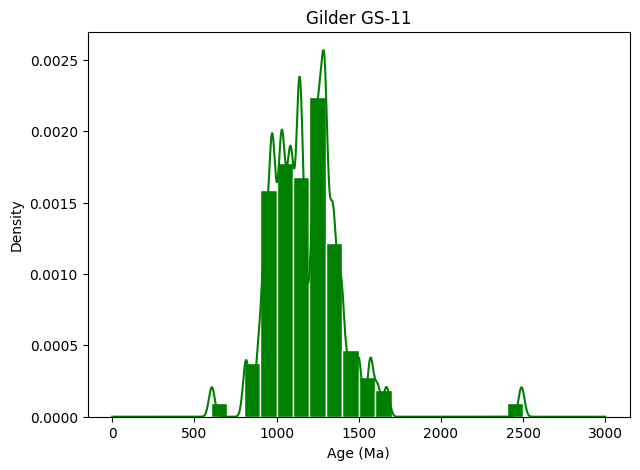

In [25]:
forAgeCalcdf = pd.read_excel('ForAgeCalc.xlsx', usecols=['Gilder GS-11'])
data = forAgeCalcdf['Gilder GS-11'].dropna()

kde = gaussian_kde(data, bw_method=0.08)
x_vals = np.linspace(0, 3000, 1000)
density = kde(x_vals)

fig,ax = plt.subplots(figsize=(7,5))
ax.hist(forAgeCalcdf['Gilder GS-11'], color='green', edgecolor='white', bins=range(0,3000,100), density=True)
ax.plot(x_vals, density, color='green')
plt.xlabel('Age (Ma)')
plt.ylabel('Density')
plt.title('Gilder GS-11')

In [26]:
def kde_hist_grapher_small(file_name, col_name, bw, the_color, edge_color, lower, upper, nums, num_bins, width, height, title):
    # Creates a pandas data frame from an excel file and a specified column
    dataFrame = pd.read_excel(file_name, usecols=[col_name])
    # Eliminates all NaN entries in a specified column of the data frame
    data = dataFrame[col_name].dropna()

    # Creates a KDE object with a specific bandwidth
    kde = gaussian_kde(data, bw_method=bw)
    # Creates an array of evenly spaced numbers over a specified interval
    x_vals = np.linspace(lower, upper, nums)
    # Creates array where each point represents the density at a given x-value
    density = kde(x_vals)

    # Creates subplots on which the KDE and histogram will be plotted
    fig,ax = plt.subplots(figsize=(width, height))
    # Plots the histogram
    ax.hist(dataFrame[col_name], color=the_color, edgecolor=edge_color, bins=range(lower, upper, num_bins), density=True)
    # Plots the KDE
    ax.plot(x_vals, density, color=the_color)
    # Assigns labels to axes and creates a title
    plt.xlabel('Age (Ma)')
    plt.ylabel('Density')
    plt.title(title)

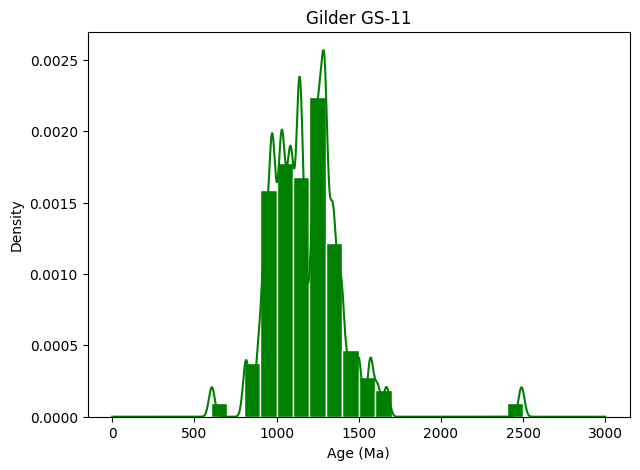

In [27]:
kde_hist_grapher_small('ForAgeCalc.xlsx', 'Gilder GS-11', 0.08, 'green', 'white', 0, 3000, 1000, 100, 7, 5, 'Gilder GS-11')

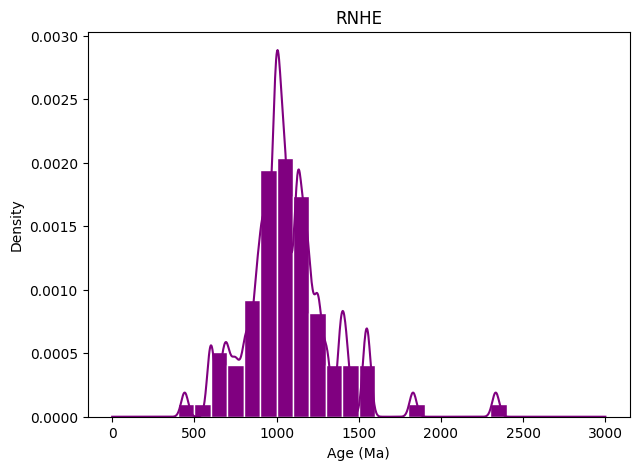

In [28]:
kde_hist_grapher_small('ForAgeCalc.xlsx', 'RNHE', 0.08, 'purple', 'white', 0, 3000, 1000, 100, 7, 5, 'RNHE')

In [29]:
def kde_hist_grapher(file_name, width, height, bw, lower, upper, nums, num_bins, colorList):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)
    # Creates a list of the columns in the data frame
    column_list = df.columns.tolist()
    # List comprehension creating a list of the non-error columns in the data frame
    newList = [column for column in column_list if 'Error' not in column]
    # Provies length of newList; used later on during plotting
    num_samples = len(newList)

    # Joins corresponding values in newList and colorList and iterates through them
    for column, the_color in zip(newList, colorList):
        # Eliminates all NaN entries in a specified column of the data frame
        data = df[column].dropna()
        # Arranges data into a KDE object that is used to create arrays necessary to plot the KDE
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        # Plots histogram and KDE
        ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
        ax.plot(x_vals, density, color=the_color)
    # Labels the x-axis
    plt.xlabel('Age (Ma)')

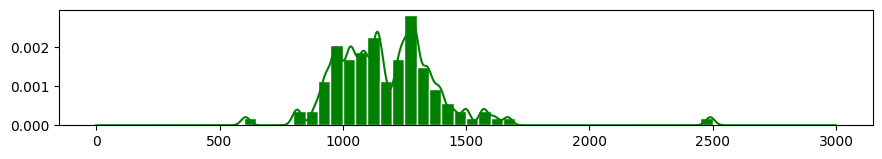

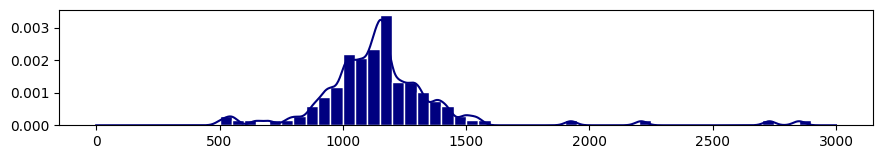

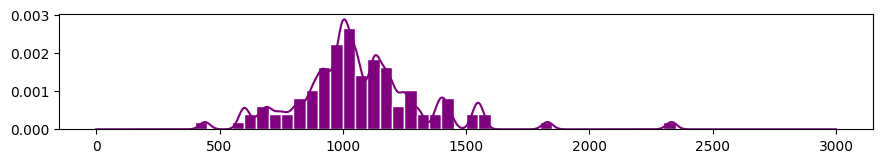

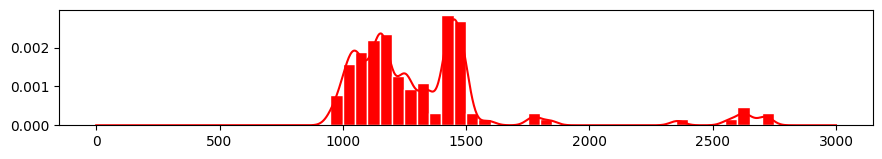

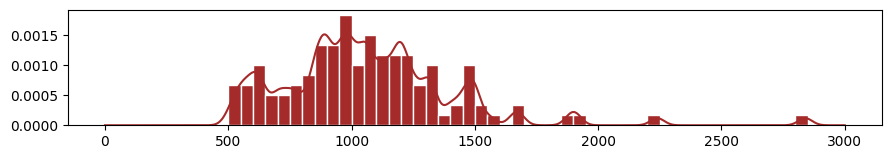

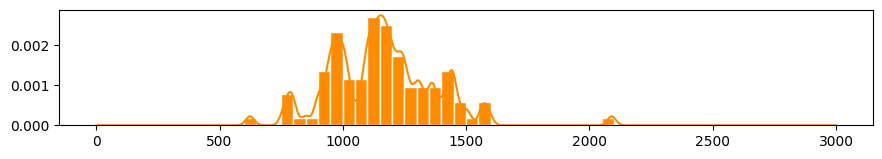

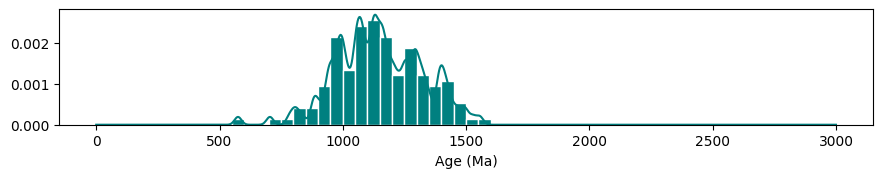

In [30]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green','navy','purple','red','brown','darkorange','teal'])

In [31]:
def kde_hist_graph(file_name, width, height, bw, lower, upper, nums, num_bins, colorList):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)
    # Creates a list of the columns in the data frame
    column_list = df.columns.tolist()
    # List comprehension creating a list of the non-error columns in the data frame
    newList = [column for column in column_list if 'Error' not in column]
    # Provies length of newList; used later on during plotting
    num_samples = len(newList)

    # Joins corresponding values in newList and colorList and iterates through them
    for column, the_color in zip(newList, colorList):
        # Eliminates all NaN entries in a specified column of the data frame
        data = df[column].dropna()
        # Arranges data into a KDE object that is used to create arrays necessary to plot the KDE
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        # Plots histogram and KDE
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
        ax.plot(x_vals, density, color=the_color)
        # Counts and displays the number of data points in a column of the data frame
        ax.set_title(column + " (n = " + str(len(data)) + ")", x=0.85, y=0.5)
        
    # Labels the x-axis
    plt.xlabel('Age (Ma)')

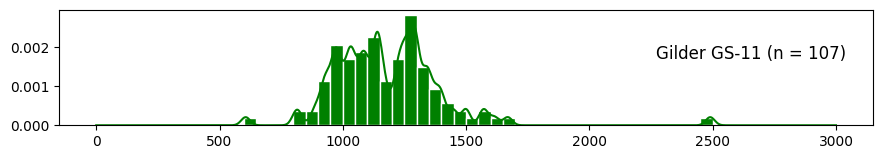

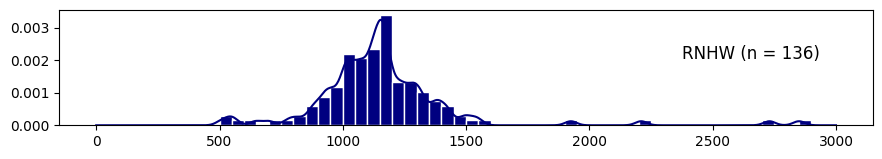

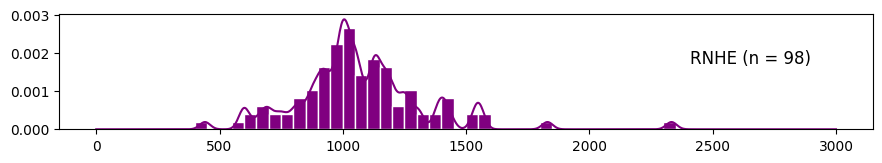

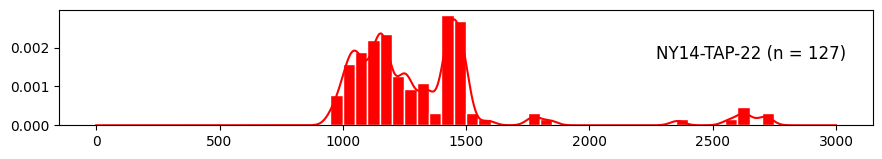

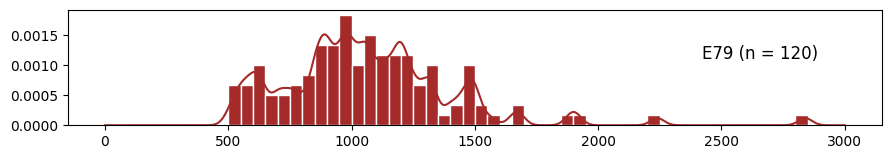

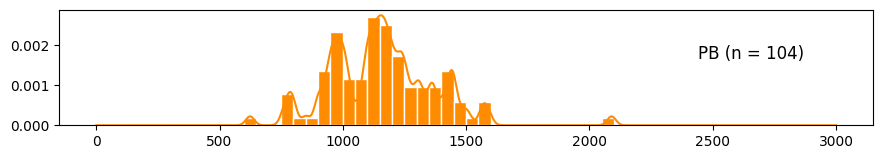

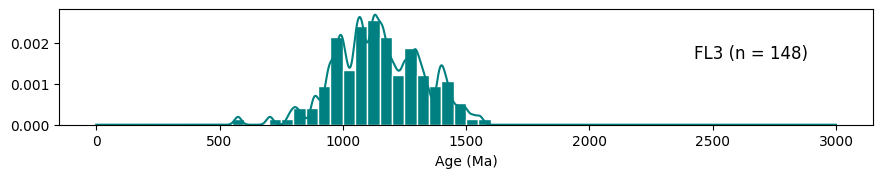

In [32]:
kde_hist_graph('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy','purple','red','brown','darkorange','teal'])

In [33]:
def kde_hist_grapher(file_name, width, height, bw, lower, upper, nums, num_bins, color_list, hist_input, kde_input):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)
    # Creates a list of the columns in the data frame
    column_list = df.columns.tolist()
    # List comprehension creating a list of the non-error columns in the data frame
    new_list = [column for column in column_list if 'Error' not in column]
    # Provies length of newList; used later on during plotting
    num_samples = len(new_list)

    # Joins corresponding values in newList and colorList and iterates through them
    for column, the_color in zip(new_list, color_list):
        # Eliminates all NaN entries in a specified column of the data frame
        data = df[column].dropna()
        # Arranges data into a KDE object that is used to create arrays necessary to plot the KDE
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        
        # Sets up subplots and specifies their size
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        # Plots histogram and KDE
        if hist_input == True and kde_input == True:
            ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax.plot(x_vals, density, color=the_color)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
        # Plots only KDE
        elif kde_input == True:
            ax.plot(x_vals, density, color=the_color)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
        # Plots only histogram
        elif hist_input == True:
            ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
            
    # Labels the x-axis
    plt.xlabel('Age (Ma)')

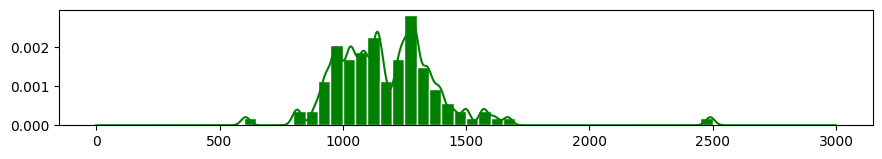

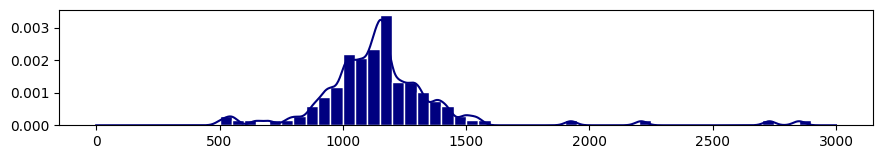

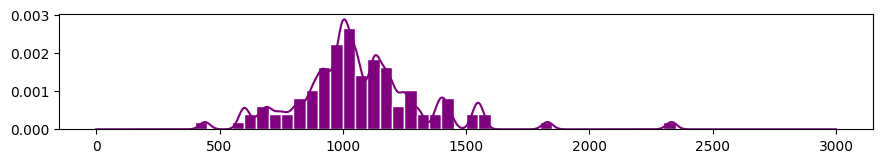

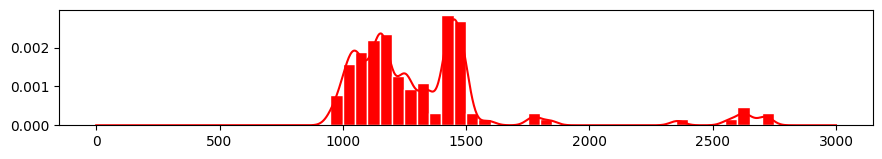

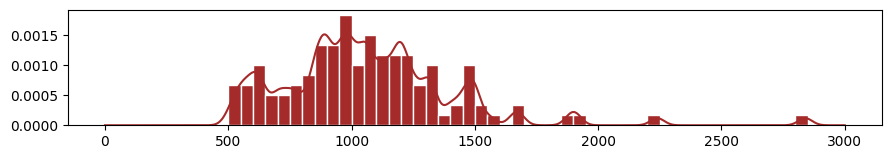

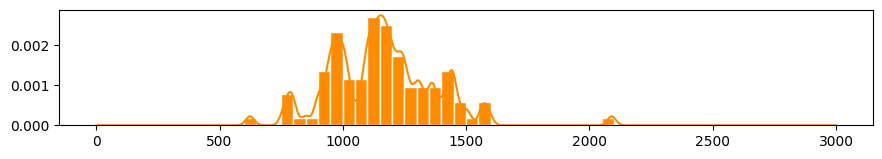

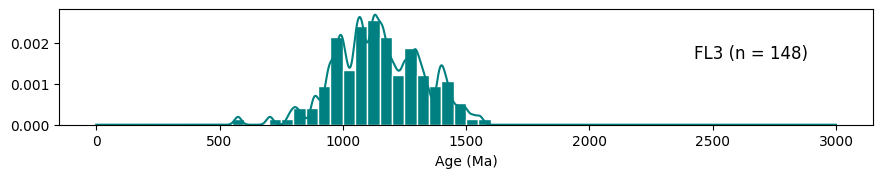

In [374]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], True, True)

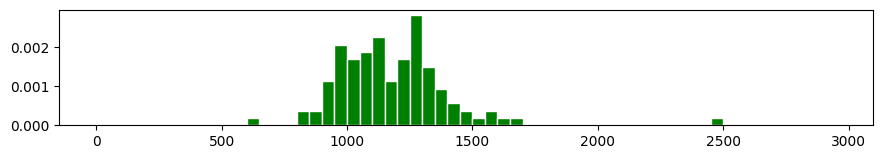

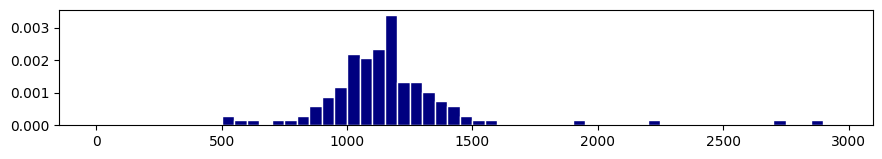

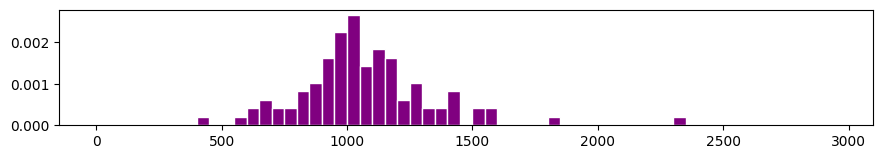

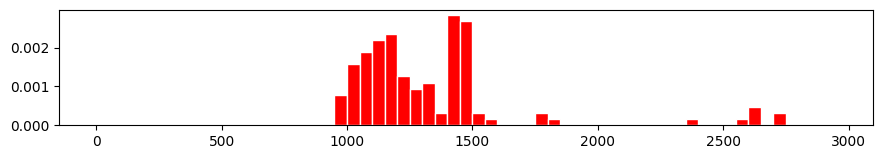

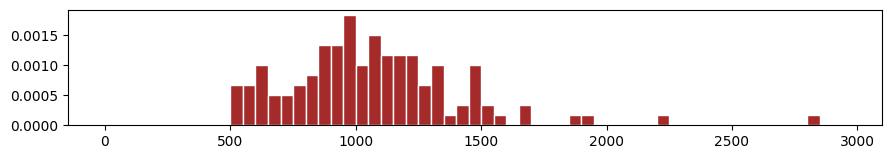

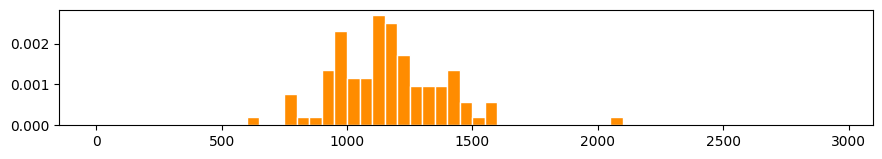

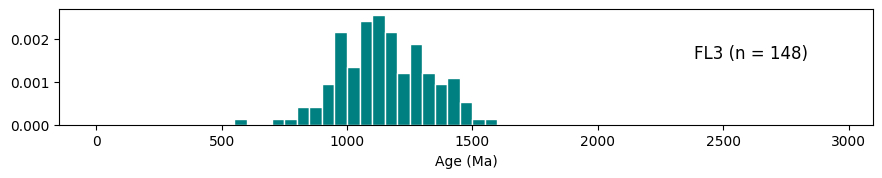

In [375]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], True, False)

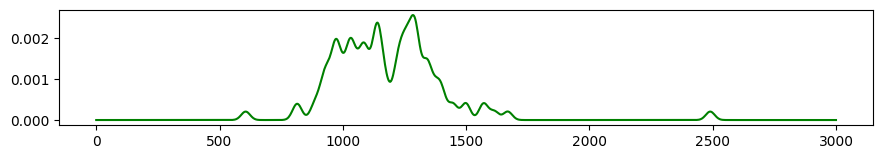

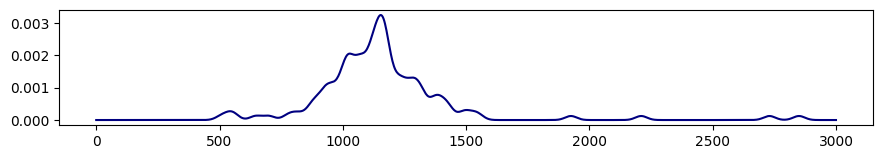

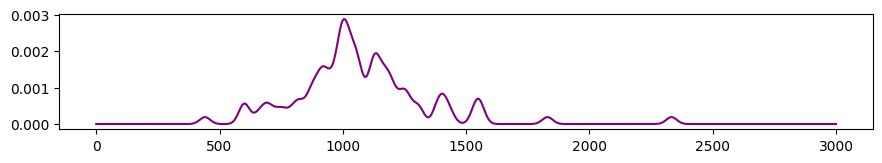

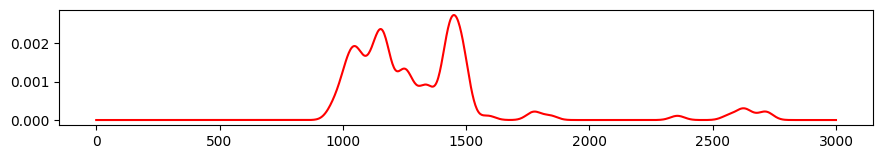

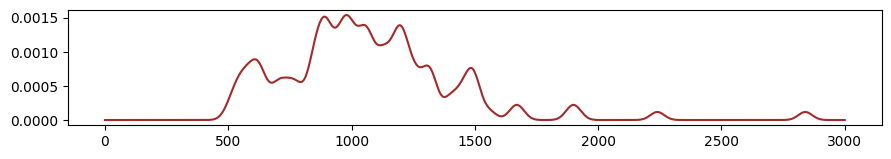

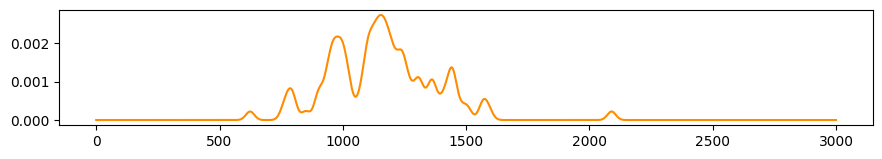

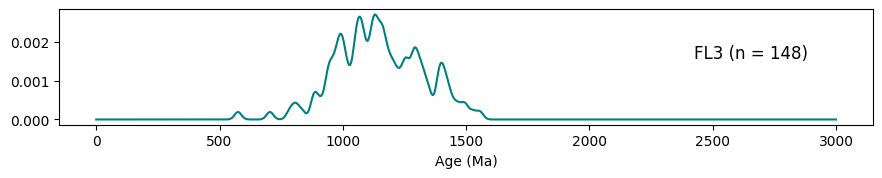

In [376]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], False, True)